In [1]:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf, plot_acf
from tqdm.auto import tqdm
import plotly.express as px

In [6]:


# Load the dataset
df = pd.read_csv(r'C:\Users\vrishin\Desktop\GMU\GMU_class\1st sem\Big_data\datasets\Air_Traffic_Passenger_Statistics.csv')
print(df.columns)




Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count'],
      dtype='object')


In [8]:
# Data Preparation
df['Date'] = pd.to_datetime(df['Activity_Period'], format='%Y%m')
df = df.sort_values('Date')

# Line plot of passenger count over time with mixed colors
fig = px.line(df, x='Date', y='Passenger_Count', title='Passenger Count Over Time',
              color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [9]:


# Time Series Analysis
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M')).sum()

# Time Series Analysis using Plotly Express
fig = px.line(x=monthly_data.index, y=monthly_data['Passenger_Count'],
              labels={'y': 'Passenger Count'},
              title='Monthly Passenger Count at SFO')

# Customize the layout
fig.update_layout(xaxis_title='Year', yaxis_title='Passenger_Count', height=500, width=1000)

# Show the plot
fig.show()

C:\Users\vrishin\AppData\Local\Temp\ipykernel_4088\1915529258.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [10]:


# Seasonal Pattern Analysis
decomposition = sm.tsa.seasonal_decompose(monthly_data['Passenger_Count'], model='additive')
seasonal_component = decomposition.seasonal

# Seasonal Pattern Analysis using Plotly Express
fig = px.line(x=monthly_data.index, y=seasonal_component,
              labels={'y': 'Seasonal Component'},
              title='Seasonal Component of Monthly Passenger Count at SFO')

# Customize the layout
fig.update_layout(xaxis_title='Year', yaxis_title='Seasonal_Component', height=500, width=1000)

# Show the plot
fig.show()

In [11]:


# Statistical Tests
residuals = decomposition.resid

# Handle Missing Data in Residuals
residuals = residuals.dropna()  # Remove rows with missing values

# Augmented Dickey-Fuller Test for Stationarity
adf_result = adfuller(residuals)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t{}: {}'.format(key, value))
# Interpretation and Conclusion
# Based on the ADF test, if the p-value is below a significance level (e.g., 0.05), we reject the null hypothesis of non-stationarity.
if adf_result[1] < 0.05:
    print('The residuals are stationary.')
    print('The seasonal decomposition effectively captures the predominant trends and seasonal patterns within the passenger count data at San Francisco International Airport (SFO).')
    print('Any residual variations that persist can be interpreted as stochastic noise or irregular fluctuations.')
else:
    print('The residuals are non-stationary.')
    print('There could be latent trends or patterns within the passenger count data that the seasonal decomposition method might not have adequately captured.')
    print('Additional examination is required to identify and scrutinize these patterns, as they may have ramifications for capacity planning, resource allocation, and strategic decision-making at San Francisco International Airport (SFO).')

ADF Statistic: -6.86148153234896
p-value: 1.5983408710876954e-09
Critical Values:
	1%: -3.464161278384219
	5%: -2.876401960790147
	10%: -2.5746921001665974
The residuals are stationary.
The seasonal decomposition effectively captures the predominant trends and seasonal patterns within the passenger count data at San Francisco International Airport (SFO).
Any residual variations that persist can be interpreted as stochastic noise or irregular fluctuations.


In [13]:


# Rolling Mean and Standard Deviation
rolling_mean = monthly_data['Passenger_Count'].rolling(window=12).mean()
rolling_std = monthly_data['Passenger_Count'].rolling(window=12).std()

# Plotting using Plotly Express
fig = px.line(x=monthly_data.index, y=monthly_data['Passenger_Count'], labels={'y': 'Passenger_Count'},
              title='Monthly Passenger Count, Rolling Mean, Rolling Std')

fig.add_scatter(x=rolling_mean.index, y=rolling_mean, mode='lines', name='Rolling Mean')
fig.add_scatter(x=rolling_std.index, y=rolling_std, mode='lines', name='Rolling Std')

# Customize the layout
fig.update_layout(xaxis_title='Year', yaxis_title='Passenger Count')
fig.show()

In [14]:


# Market Share Analysis
total_passenger_count = df['Passenger_Count'].sum()
airline_data = df['Operating_Airline'].value_counts()

# Calculate percentage share
percentage_share = (airline_data / total_passenger_count) * 100

# Debugging Print Statements
print("\n\n")
print("Percentage Share:")
print("\n\n")
print(percentage_share)

# Identify airlines with the highest and lowest percentage share
top_airlines = percentage_share.sort_values(ascending=False).head(5)
bottom_airlines = percentage_share.sort_values().head(5)

# Debugging Print Statements
print("\n\n")
print("Top Airlines:\n")
print(top_airlines)
print("\n\n")
print("Bottom Airlines:\n")
print(bottom_airlines)




Percentage Share:



Operating_Airline
United Airlines                     4.144726e-04
United Airlines - Pre 07/01/2013    2.842324e-04
SkyWest Airlines                    2.330336e-04
Alaska Airlines                     1.492418e-04
Delta Air Lines                     8.181249e-05
                                        ...     
Trego Dugan Aviation                2.639113e-07
Evergreen International Airlines    2.639113e-07
ZIPAIR Tokyo Inc                    2.639113e-07
Boeing Company                      1.319556e-07
Samsic Airport America, LLC         1.319556e-07
Name: count, Length: 102, dtype: float64



Top Airlines:

Operating_Airline
United Airlines                     0.000414
United Airlines - Pre 07/01/2013    0.000284
SkyWest Airlines                    0.000233
Alaska Airlines                     0.000149
Delta Air Lines                     0.000082
Name: count, dtype: float64



Bottom Airlines:

Operating_Airline
Samsic Airport America, LLC         1.319556e-07
B

In [21]:
import plotly.express as px

# Convert Series to DataFrame
top_airlines_df = top_airlines.reset_index()
top_airlines_df.columns = ['Operating_Airline', 'Market_Share']

bottom_airlines_df = bottom_airlines.reset_index()
bottom_airlines_df.columns = ['Operating_Airline', 'Market_Share']

# Plotting Market Share using Plotly Express
fig = px.bar(top_airlines_df, x='Operating_Airline', y='Market_Share',
             title='Top 5 Airlines by Market Share',
             labels={'Market_Share': 'Market Share (%)'},
             color='Operating_Airline')

# Update layout for the first subplot
fig.update_layout(showlegend=False)

# Show the plot for top airlines
fig.show()

# Plotting Market Share for Bottom Airlines using Plotly Express
fig = px.bar(bottom_airlines_df, x='Operating_Airline', y='Market_Share',
             title='Bottom 5 Airlines by Market Share',
             labels={'Market_Share': 'Market Share (%)'},
             color='Operating_Airline')

# Update layout for the second subplot
fig.update_layout(showlegend=False)

# Show the plot for bottom airlines
fig.show()


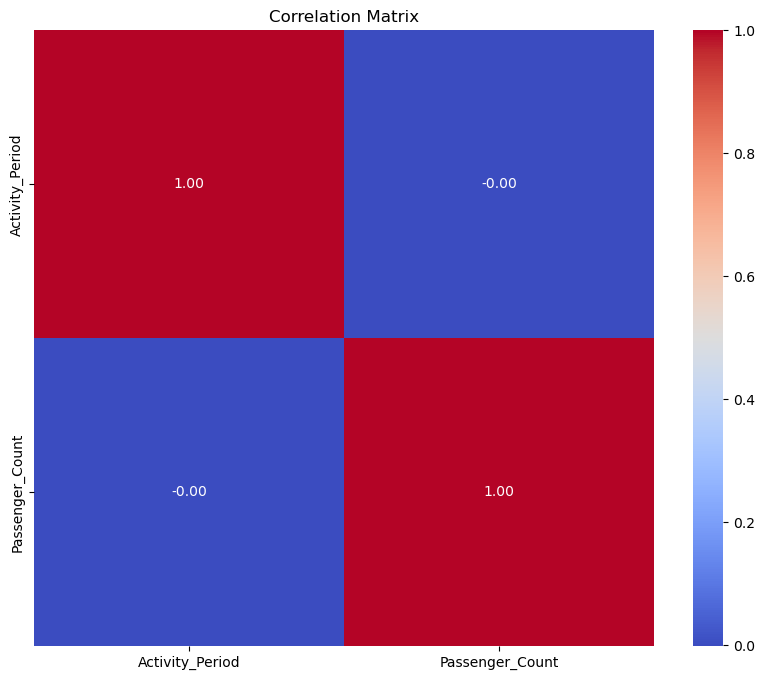

In [23]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


C:\Users\vrishin\AppData\Local\Temp\ipykernel_4088\2574445486.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




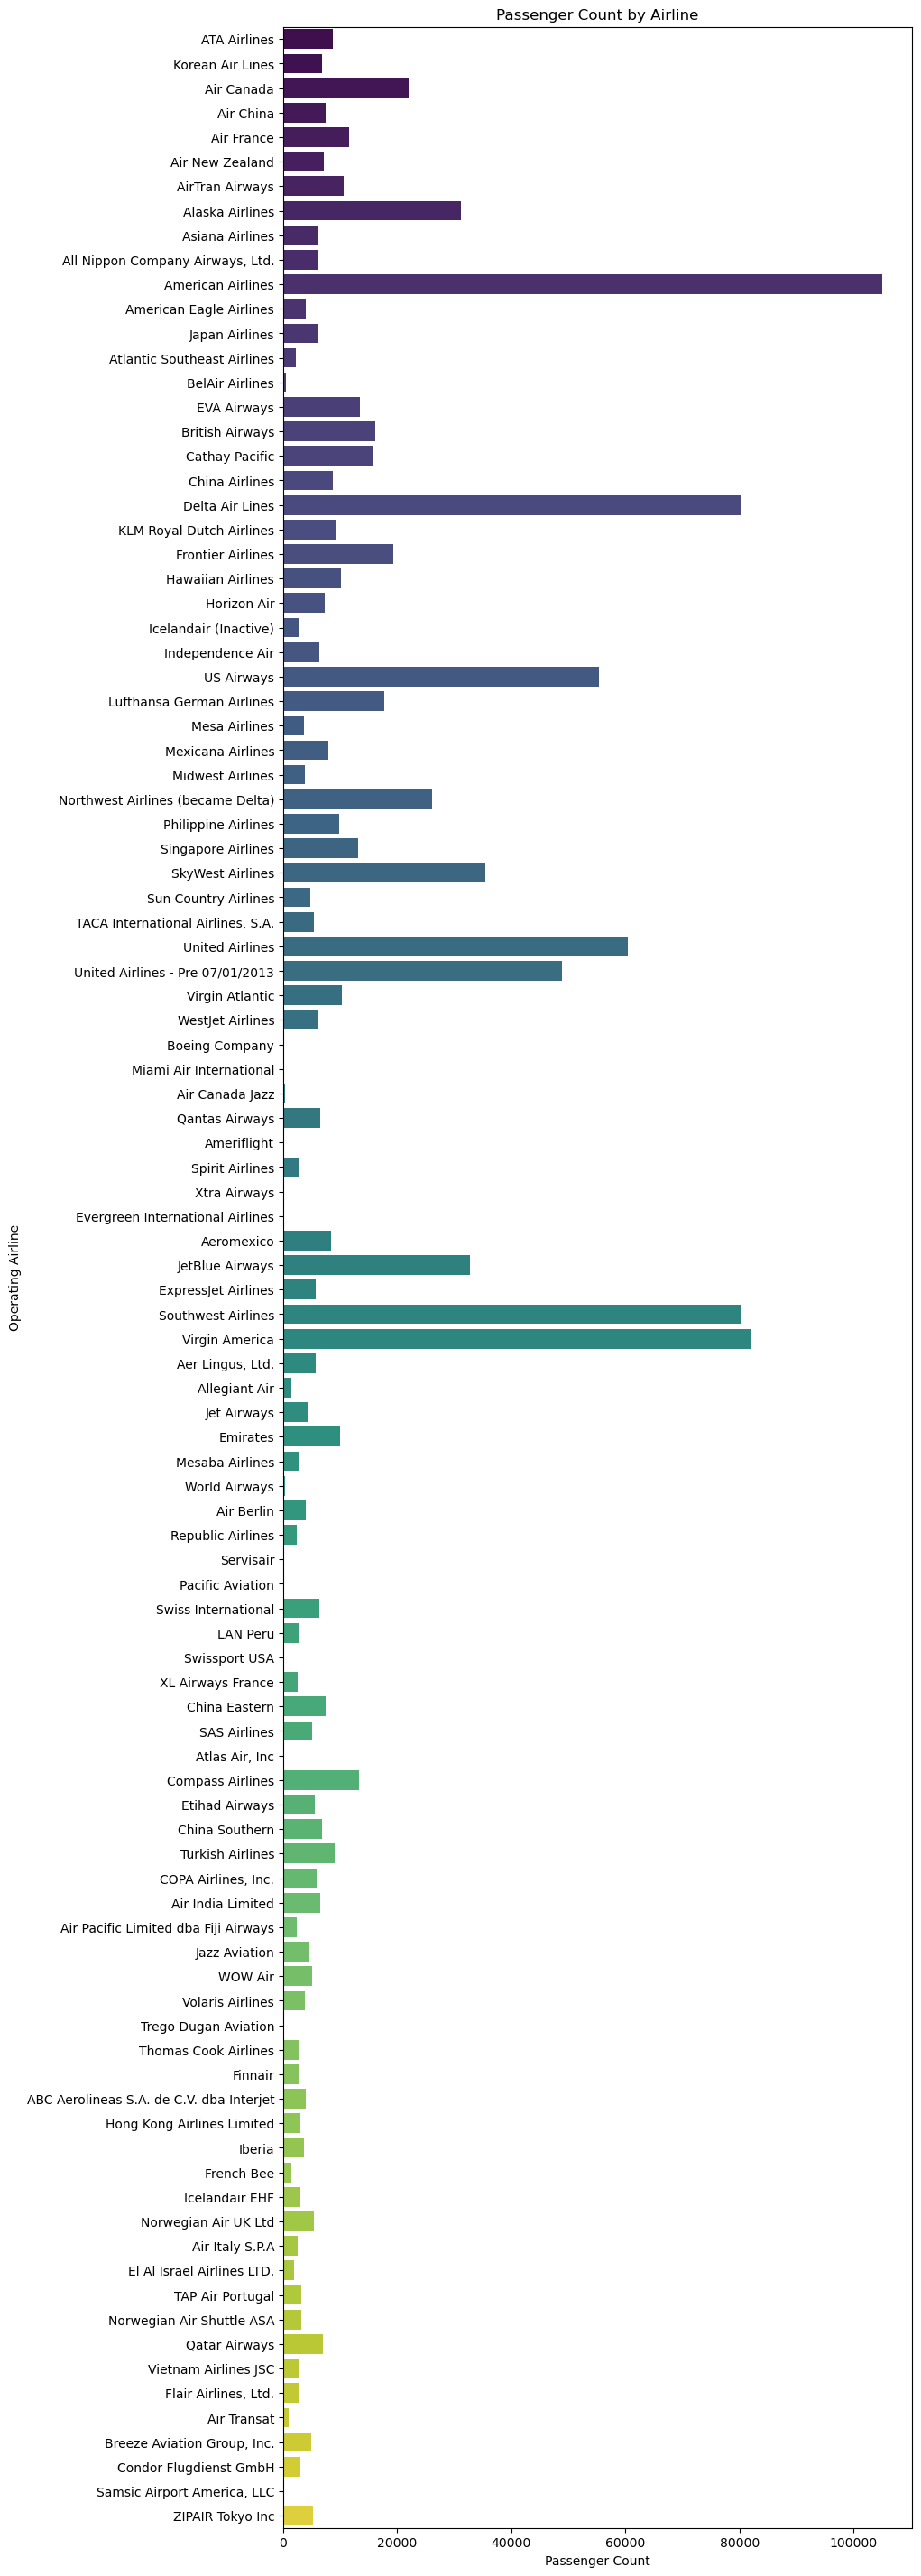

In [26]:
# Bar Chart for Passenger Count by Airline
plt.figure(figsize=(9, 36))
sns.barplot(x='Passenger_Count', y='Operating_Airline', data=df, palette='viridis', errorbar=None)
plt.title('Passenger Count by Airline')
plt.xlabel('Passenger Count')
plt.ylabel('Operating Airline')
plt.show()


In [27]:


df['Year'] = pd.to_datetime(df['Activity_Period'], format='%Y%m').dt.year.astype(str)
df['Month'] = pd.to_datetime(df['Activity_Period'], format='%Y%m').dt.month.astype(str).str.zfill(2)
df = df[['Year', 'Month', 'GEO_Summary', 'Passenger_Count']].dropna()

In [38]:
print(df.columns.tolist())
print(df.shape)


['Year', 'Month', 'GEO_Summary', 'Passenger_Count']
(26576, 4)


In [40]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

tqdm.pandas()

# Load the data
file_path = r'C:\Users\vrishin\Desktop\GMU\GMU_class\1st sem\Big_data\datasets\Air_Traffic_Passenger_Statistics.csv'
data = pd.read_csv(file_path)

# Create a box plot for passenger count by geo region using Plotly
fig = px.box(data, x='GEO_Region', y='Passenger_Count',
             title='Box Plot of Passenger Count by Geo Region',
             labels={'GEO Region': 'Geo Region', 'Passenger Count': 'Passenger Count'},
             boxmode='overlay', color_discrete_sequence=['#9467bd'])

# Customize the layout
fig.update_layout(xaxis_title='Geo Region', yaxis_title='Passenger Count', height=500, width=800)

# Show the plot
fig.show()

In [43]:


# Violin Plot for Passenger Count by Activity Type

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

tqdm.pandas()

# Load the data
file_path = r'C:\Users\vrishin\Desktop\GMU\GMU_class\1st sem\Big_data\datasets\Air_Traffic_Passenger_Statistics.csv'
data = pd.read_csv(file_path)

# Create a violin plot for passenger count by activity type using Plotly
fig = px.violin(data, x='Activity_Type_Code', y='Passenger_Count',
                title='Violin Plot of Passenger Count by Activity Type',
                labels={'Activity Type Code': 'Activity Type', 'Passenger Count': 'Passenger Count'},
                box=True, points="all")

# Customize the layout
fig.update_layout(xaxis_title='Activity Type', yaxis_title='Passenger Count', height=500, width=800)

# Show the plot
fig.show()

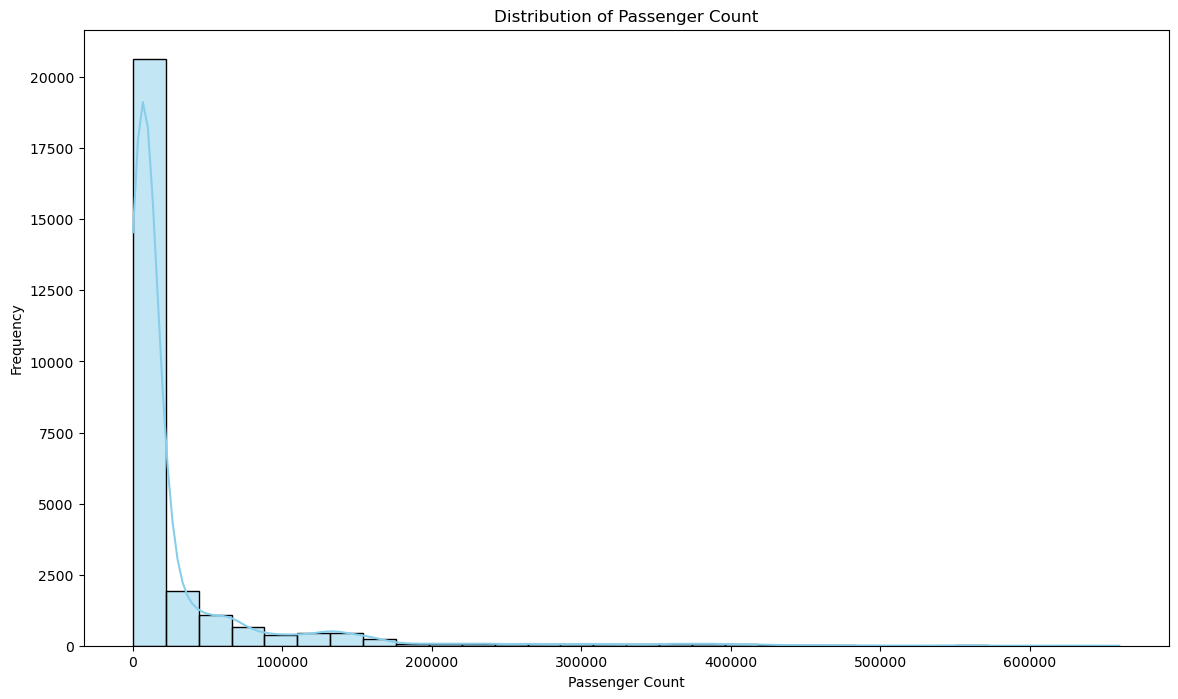

In [44]:


# Distribution Plot for Passenger Count
plt.figure(figsize=(14, 8))
sns.histplot(df['Passenger_Count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Autocorrelation Analysis - Domestic Flights
# Separate data for domestic flights
domestic_data = df[df['GEO_Summary'] == 'Domestic']

# Autocorrelation Analysis for Domestic Flights
lags_domestic = 12
acf_domestic = acf(domestic_data['Passenger_Count'], nlags=lags_domestic)

# Plot Autocorrelation using Plotly
fig_domestic = px.bar(x=list(range(lags_domestic + 1)), y=acf_domestic,
                      labels={'y': 'Autocorrelation', 'x': 'Lag'},
                      title="Autocorrelation - Domestic Flights",
                      color_discrete_sequence=['skyblue'],
                      height=400, width=800)

# Show the plot
fig_domestic.show()

In [47]:


# Autocorrelation Analysis - International Flights
international_data = df[df['GEO_Summary'] == 'International']

# Autocorrelation Analysis for International Flights
lags_international = 12
acf_international = acf(international_data['Passenger_Count'], nlags=lags_international)

# Plot Autocorrelation using Plotly
fig_international = px.bar(x=list(range(lags_international + 1)), y=acf_international,
                           labels={'y': 'Autocorrelation', 'x': 'Lag'},
                           title="Autocorrelation - International Flights",
                           color_discrete_sequence=['lightcoral'],
                           height=400, width=800)

# Show the plot
fig_international.show()

In [56]:
df = pd.read_csv(r'C:\Users\vrishin\Desktop\GMU\GMU_class\1st sem\Big_data\datasets\Air_Traffic_Passenger_Statistics.csv')
print(df.columns)
# Strip spaces from column names
df.columns = df.columns.str.strip()


Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count'],
      dtype='object')


In [57]:
import plotly.express as px

# Group by Operating_Airline and sum Passenger_Count
top_airlines_df = df.groupby('Operating_Airline')['Passenger_Count'].sum().reset_index().nlargest(10, 'Passenger_Count')

# Plot the market share using Plotly
fig = px.bar(top_airlines_df, x='Operating_Airline', y='Passenger_Count', 
             title='Top 10 Airlines by Market Share',
             labels={'Passenger_Count': 'Total Passengers', 'Operating_Airline': 'Airlines'},
             text='Passenger_Count',
             height=500, width=800)

# Customize the layout
fig.update_layout(xaxis=dict(tickangle=45),
                  yaxis_title='Total Passengers',
                  xaxis_title='Airlines',
                  showlegend=False)

# Show the plot
fig.show()


In [59]:


#b. Seasonal Variations Impact on Airport Traffic:
# Convert Activity_Period to datetime if it's not already in that format
df['YearMonth'] = pd.to_datetime(df['Activity_Period'], format='%Y%m')

# Group data by month and calculate average passenger count
monthly_avg_traffic = df.groupby(df['YearMonth'].dt.month)['Passenger_Count'].mean().reset_index()

# Plot seasonal variations in airport traffic using Plotly
fig = px.line(monthly_avg_traffic, x='YearMonth', y='Passenger_Count',
              title='Seasonal Variations in Airport Traffic',
              labels={'Passenger_Count': 'Average Passenger Count', 'YearMonth': 'Month'},
              height=500, width=800)

# Show the plot
fig.show()


In [60]:


#c. Distinguishing Characteristics of LCCs vs. Legacy Airlines:
# Define a list of LCCs based on previous criteria
lcc_list = ['ATA Airlines', 'AirTran Airways']

# Create a new column 'Airline Type' based on the list
df['Airline Type'] = df['Operating_Airline'].apply(lambda x: 'LCC' if x in lcc_list else 'Legacy')

# Group data by airline type and calculate total passenger count
airline_type_data = df.groupby('Airline Type')['Passenger_Count'].sum().reset_index()  # Ensure 'Passenger_Count' is correct

# Plot the total passenger count by airline type using Plotly
fig = px.bar(airline_type_data, x='Airline Type', y='Passenger_Count',  # Make sure 'Passenger_Count' is referenced correctly
             color='Airline Type',
             title='Total Passenger Count by Airline Type',
             labels={'Passenger_Count': 'Total Passengers', 'Airline Type': 'Airline Type'},
             height=500, width=600)

# Customize the layout
fig.update_layout(showlegend=False)

# Save the grouped data to a new CSV file
airline_type_data.to_csv('airline_type_data.csv', index=False)

# Show the plot
fig.show()


In [63]:


#d. Geographical Impact on International Airlines:
# Group data by GEO Region and calculate total passenger count
geo_data = df[df['GEO_Summary'] == 'International'].groupby('GEO_Region')['Passenger_Count'].sum().reset_index()

# Plot a pie chart using Plotly to visualize the distribution of passenger count by GEO Region
fig = px.pie(geo_data, values='Passenger_Count', names='GEO_Region',  # Corrected column names
             title='Distribution of Passenger Count by GEO Region',
             labels={'Passenger_Count': 'Total Passengers', 'GEO_Region': 'GEO Region'})

# Save the grouped data to a new CSV file
geo_data.to_csv('geo_type_data.csv', index=False)

# Show the plot
fig.show()


In [68]:
# e. Influence of Airline Alliances on Passenger Volumes:
airline_alliances = {
    'ATA Airlines': 'Alliance1',
    'Air Canada': 'Alliance2',
    'Air China': 'Alliance1',
    'Air France': 'Alliance2',
    'Air New Zealand': 'Alliance1',
    'AirTran Airways': 'Alliance3',
}

# Mapping airline alliances to the 'Operating_Airline' column
df['Airline_Alliance'] = df['Operating_Airline'].map(airline_alliances)

# Group data by 'Airline_Alliance' and 'Operating_Airline', and sum 'Passenger_Count'
alliance_data = df.groupby(['Airline_Alliance', 'Operating_Airline'])['Passenger_Count'].sum().reset_index()

# Plotting the bar chart
fig = px.bar(alliance_data, x='Airline_Alliance', y='Passenger_Count',
             color='Operating_Airline',
             title='Comparison of Passenger Count among Airline Alliances and Airlines',
             labels={'Passenger_Count': 'Total Passengers', 'Airline_Alliance': 'Airline Alliance'},
             height=500, width=800)

# Update the layout to use stacked bars
fig.update_layout(barmode='stack')

# Show the plot
fig.show()

# Save the grouped data to a CSV file
output_file_path = 'airline_alliance_passenger_counts.csv'
alliance_data.to_csv(output_file_path, index=False)
